In [107]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [108]:
from tensorflow import keras

1. load the dataset

In [109]:
import sklearn.datasets as ds
breast_ds = ds.load_breast_cancer()
print(dir(breast_ds))
print(breast_ds['DESCR'])

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for

2. prepare the training and test set

In [110]:
from sklearn.model_selection import train_test_split

X = breast_ds.data
y = breast_ds.target
print('size of the feature vectors:', X.shape)
print('size of y:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('size of the training set:', y_train.shape)
print('size of the test set:', y_test.shape)

size of the feature vectors: (569, 30)
size of y: (569,)
size of the training set: (455,)
size of the test set: (114,)


3. Create a NN model using keras Sequential model, which is a stack of layers
4. Train the model

    4.1 Argements of the fit function:
        - epochs: test 100, 200, 300, ...
        - batch_size: 4, 8, 16, 32, 64,
        - validation_split: 0.2
        - verbose: 0, 1

    4.2 Return argument:
        - h.history
        
##### NN design tips: 
- if get low training and validation accuray, this is because of underfitting and you can increase the number of hidden nodes
- if get high training accuray and low validation accuracy, you can consider reduce the number of hidden nodes and apply early stopping strategy.

In [121]:
### 4.1 create and train NNs

# practice different configurations of the network, and 
# check the differences in the results
## 1): 5 hidden units for h1, and 5 units for h2  
## 2): 10 hidden units for h1, and 5 units for h2 
## 3): 30 hidden units for h1, and 10 units for h2 

model2 = keras.models.Sequential() # an empty model
model2.add(keras.layers.Dense(units =5,     
                              input_dim=30,# 
                              activation = 'relu')) #h 1

model2.add(keras.layers.Dense(units = 5,     
                              activation = 'relu'))# h 2

model2.add(keras.layers.Dense(units = 2,
                              activation='softmax')) #output  layer

#sgd_optimizer = keras.optimizers.SGD(learning_rate=0.0001)
adam_optimizer = keras.optimizers.Adam()
model2.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# prepare one-hot vectors
y_train_onehot = keras.utils.to_categorical(y_train)

#After class practice: train the model and report the test accuracy
# train the model
h = model2.fit(X_train, y_train_onehot, 
           batch_size = 16,
           epochs = 100,
           validation_split = 0.2,
           verbose = 1)


# evaluate the model
import numpy as np
y_train_pred = np.argmax(model2.predict(X_train), axis=-1)
train_acc = sum(y_train == y_train_pred)/y_train.shape[0]

y_test_pred = np.argmax(model2.predict(X_test), axis=-1)
test_acc = sum(y_test == y_test_pred)/y_test.shape[0]

print('training acc is', train_acc)
print('test acc is', test_acc)


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 5)                 155       
_________________________________________________________________
dense_103 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 12        
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 [==============================] - 0s 7ms/step - loss: 197.0877 - accuracy: 0.6126 - val_loss: 129.8838 - val_accuracy: 0.7033
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 136.6999 - accuracy: 0.6126 - val_loss: 83.7968 - val_accuracy: 0.7033
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 77.4808 - accuracy: 0.6

23/23 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.9093 - val_loss: 0.3507 - val_accuracy: 0.8681
Epoch 54/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8929 - val_loss: 0.3586 - val_accuracy: 0.8681
Epoch 55/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8956 - val_loss: 0.3352 - val_accuracy: 0.8681
Epoch 56/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9093 - val_loss: 0.4837 - val_accuracy: 0.8242
Epoch 57/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9011 - val_loss: 0.4324 - val_accuracy: 0.8132
Epoch 58/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.9093 - val_loss: 0.3698 - val_accuracy: 0.8571
Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.9203 - val_loss: 0.3143 - val_accuracy: 0.8791
Epoch 60/100
23/23 

4.2 Visualize h.history

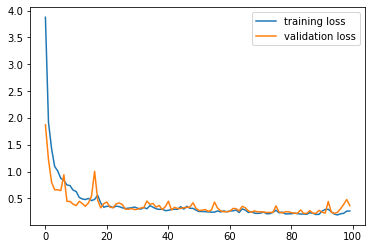

In [117]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label = 'training loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()

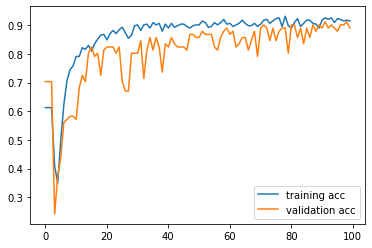

In [122]:
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'], label = 'training acc')
plt.plot(h.history['val_accuracy'], label = 'validation acc')
plt.legend()

5. Early stopping

In [123]:
# this model is trained based on the previous 20-epochs training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
h1 = model2.fit(X_train, y_train_onehot, 
           batch_size = 16,
           epochs = 300, # very large # epochs
           validation_split = 0.2,
           callbacks = [early_stopping],
           verbose = 1)

Epoch 1/300
23/23 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9121 - val_loss: 0.2159 - val_accuracy: 0.9011
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9121 - val_loss: 0.2981 - val_accuracy: 0.8681
Epoch 3/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9203 - val_loss: 0.2118 - val_accuracy: 0.9011
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8874 - val_loss: 0.3838 - val_accuracy: 0.8462
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9231 - val_loss: 0.2666 - val_accuracy: 0.9011
Epoch 6/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.9038 - val_loss: 0.2860 - val_accuracy: 0.8681


In [96]:
#  accuracy
import numpy as np
y_train_pred = np.argmax(model2.predict(X_train), axis=-1)
train_acc = sum(y_train == y_train_pred)/y_train.shape[0]

y_test_pred = np.argmax(model2.predict(X_test), axis=-1)
test_acc = sum(y_test == y_test_pred)/y_test.shape[0]

print('training acc is', train_acc)
print('test acc is', test_acc)

training acc is 0.9538461538461539
test acc is 0.956140350877193
